<a href="https://colab.research.google.com/github/tnwlvos/machinelearning2/blob/main/char4_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6759 - loss: 1.3446 - val_accuracy: 0.8309 - val_loss: 0.4724
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8106 - loss: 0.5431 - val_accuracy: 0.8447 - val_loss: 0.4285
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8317 - loss: 0.4772 - val_accuracy: 0.8532 - val_loss: 0.4038
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8415 - loss: 0.4493 - val_accuracy: 0.8595 - val_loss: 0.3860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8510 - loss: 0.4205 - val_accuracy: 0.8644 - val_loss: 0.3725
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8568 - loss: 0.4025 - val_accuracy: 0.8665 - val_loss: 0.3665
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8607 - loss: 0.3925 - val_accuracy: 0.8701 - val_loss: 0.3565
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8657 - loss: 0.3772 - val_accurac

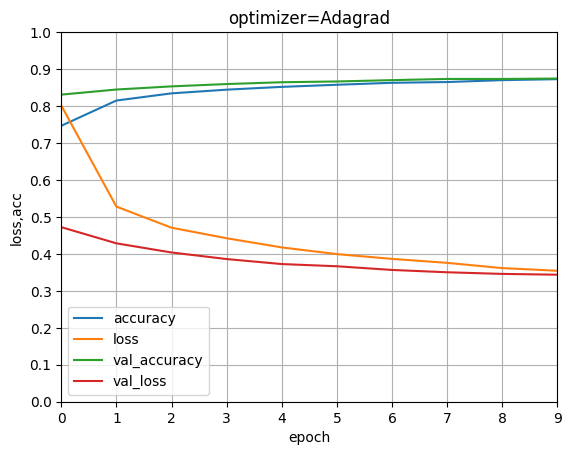

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


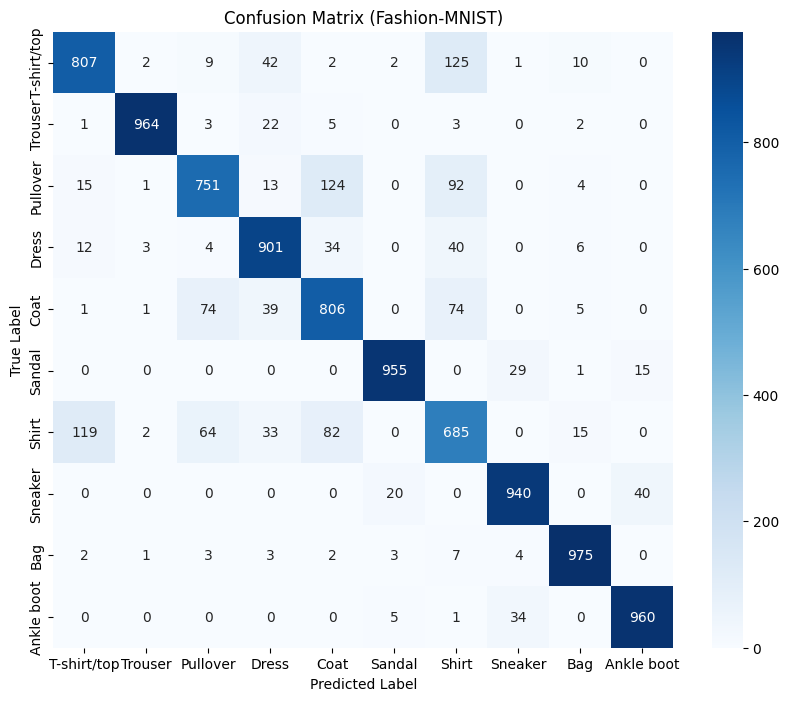

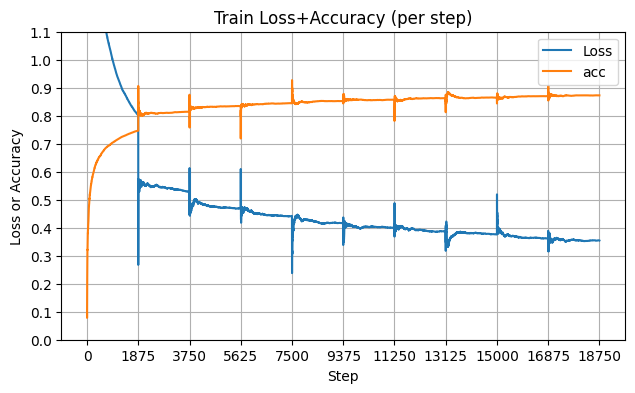

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
[9 2 1 1 6]


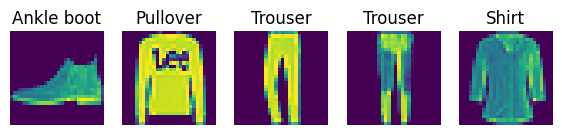

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


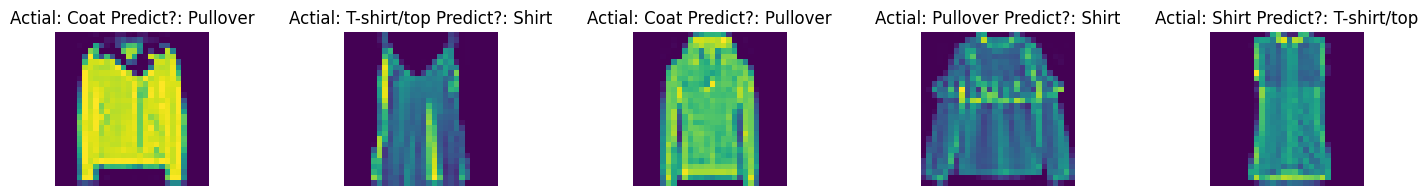

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#one-hot encoding함수
def One_Hot_Encoding(data_y):
    N=len(data_y)#데이터의 총 개수
    Q_class=np.unique(data_y)#클래스 종류
    Q=len(Q_class)#클래스 개수

    #one-hot-y초기화
    one_hot_y=np.zeros([N,Q])
    #각 클래스에 대해 One-Hot 표현으로 변환
    for k in np.arange(0,N,1):
        #해당 비교값이 자동으로 float형으로 변환 되어 저장됨(넘파이 배열 특징)
        one_hot_y[k,:]=(data_y[k]==Q_class)

    return one_hot_y
# data=pd.read_csv("C:\\Users\\User\\Downloads\\NN_data.csv")
# data=np.array(data, dtype=np.float32)
train=7
test=3



class StepHistory(Callback):
    def on_train_begin(self, logs=None):
        self.step_losses = []
        self.step_acc = []

    def on_train_batch_end(self, batch, logs=None):
        self.step_losses.append(logs.get('loss'))
        self.step_acc.append(logs.get('accuracy'))

step_history = StepHistory()
# train,test=Divide_data_set(data.copy(), train, test)

# x_train=train[:,:3]
# y_train=train[:,3]
# x_test=test[:,:3]
# y_test=test[:,3]
# (x_train, y_train),(x_test, y_test)=mnist.load_data()
(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data()

y_train=One_Hot_Encoding(y_train)
y_test=One_Hot_Encoding(y_test)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
model=keras.models.Sequential([
    keras.layers.Conv2D(100,7,activation="relu",strides=(3,3),padding="same",input_shape=[28,28,1]),
    keras.layers.AveragePooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units= 512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units= 256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units= 10, activation='softmax'),
    ])

optimizer=keras.optimizers.Adagrad(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=["accuracy"])

history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data = (x_test, y_test), verbose=1,callbacks=[step_history])

pd.DataFrame(history.history).plot()

plt.title("optimizer=Adagrad")
plt.xlabel("epoch")
plt.ylabel("loss,acc")
plt.grid(True)
plt.xticks(np.arange(0, 10,1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.gca().set_ylim(0,1.0)
plt.xlim(0,9)
plt.show()




y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Fashion-MNIST)")
plt.show()

step = 1875
#  Step 단위 그래프
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(step_history.step_losses,label="Loss")
plt.plot(step_history.step_acc,label="acc")
plt.title("Train Loss+Accuracy (per step)")
plt.gca().set_ylim(0,1.0)

plt.xlabel("Step")
plt.ylabel("Loss or Accuracy")
plt.legend()
plt.xticks(range(0, len(step_history.step_losses)+1, step))
plt.yticks(np.arange(0, 1.2, 0.1))
plt.grid(True)
plt.show()


X_new= x_test[:5]
Y_pred=np.argmax(model.predict(X_new),axis=1)
print(Y_pred)

plt.figure(figsize=(7,2))
for index, image in enumerate(X_new):
  plt.subplot(1,5,index+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(class_names[Y_pred[index]],fontsize=12)

plt.show()


wrong_index_list=[]
predict=model.predict(x_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(predict, axis=1)
for index in range(5000):
  if y_true[index] != y_pred[index]:
    wrong_index_list.append(index)
import random
new_index=random.sample(wrong_index_list,5)
wrong_X_new=x_test[new_index]

plt.figure(figsize=(18,2))
for index,image in enumerate(wrong_X_new):
  plt.subplot(1,5,index+1)
  plt.imshow(image)
  plt.axis('off')

  temp_Actial=class_names[y_true[new_index[index]]]
  temp_Predict=class_names[y_pred[new_index[index]]]
  title="Actial: {} Predict?: {}".format(temp_Actial,temp_Predict)
  plt.title(title,fontsize=12)
plt.show()

# 새 섹션
import numpy as np  #numpy 라이브러리 사용 (이름은 np로)
import matplotlib.pyplot as plt #matplotlib.pyplot 라이브러리 사용 (이름은 plt로)
import pandas as pd
from matplotlib.lines import Line2D
# data=pd.read_csv("C:\\Users\\이상훈\\Downloads\\NN_data.csv")



#시그모이드 함수
def logistic(z):
    
    logi=1/(1+np.exp(-z))
    
    return logi

def Difflogi(z):
    return z*(1-z)



#ReLU 함수
def LeakyReLU(z):
    
   
    relu=np.where(z>0,z,0.01*z)
   
    return relu

def DiffLeakyReLU(z):
    diffrelu=np.where(z>0,1,0.01)
    return diffrelu

def Softmax(z):
    # return np.exp(z)/np.sum(np.exp(z))
    shift=z-np.max(z,axis=0,keepdims=True) #안정화
    exp_z=np.exp(shift)
    return exp_z/np.sum(exp_z,axis=0,keepdims=True)
    

def Convolutional_Layer_forward(data,size,num,ft):
    ft_size=size
    chanel=1
    ft_num=num
    ft=ft
   
    image_x=data.shape[1]
    image_y=data.shape[0]
    
    out_h=image_y-ft_size+1
    out_w=image_x-ft_size+1
    
    img_list=[]
    for k in np.arange(image_y-ft_size+1):
        for j in np.arange(image_x-ft_size+1):
            img_list.append(data[k:ft_size+k,j:ft_size+j].flatten())
    img_np=np.array(img_list)
    conv=img_np@ft
    conv_3d = conv.reshape(ft_num,out_h,out_w)  
    conv_relu=LeakyReLU(conv_3d)
    
    
    
    return conv_relu,conv_3d,img_np,out_h,out_w

def Convolutional_Layer_backward(grad_conv_3d, patches, ft, ft_size, out_h, out_w, learningrate):
    ft_num = grad_conv_3d.shape[0]
    grad_conv_flat = grad_conv_3d.reshape(ft_num, -1).T  # (out_h*out_w, ft_num)
    dft = patches.T @ grad_conv_flat                     # (ft_size*ft_size, ft_num)
    ft -= learningrate * dft

    return ft
    
#one-hot encoding함수
def One_Hot_Encoding(data_y):
    N=len(data_y)#데이터의 총 개수
    Q_class=np.unique(data_y)#클래스 종류
    Q=len(Q_class)#클래스 개수
    
    #one-hot-y초기화
    one_hot_y=np.zeros([N,Q])
    #각 클래스에 대해 One-Hot 표현으로 변환
    for k in np.arange(0,N,1):
        #해당 비교값이 자동으로 float형으로 변환 되어 저장됨(넘파이 배열 특징)
        one_hot_y[k,:]=(data_y[k]==Q_class)
        
    return one_hot_y



#오차 역전파알고리즘(batch size 조절가능)leakyReLU함수+softmax 함수
def Error_Back_Propagation1(Layer,Node,batch,epoch):
    
    
    
    
    #필터 초기화
    ft_size=3
    ft_num=3
    chanel=1
    ft=np.random.rand((ft_size*ft_size*chanel),ft_num)*2-1
    

    X=[]
    for i in np.arange(0,3,1):
        for k in np.arange(1,501,1):
           
            data=pd.read_csv("C:\\Users\\이상훈\\OneDrive - 한국공학대학교\\바탕 화면\\인설\\mnist\\"+str(i)+"_"+str(k)+".csv",header=None)
            data_np=np.array(data)
           
            data, conv_3d, img_np, out_h, out_w=Convolutional_Layer_forward(data_np,ft_size, ft_num,ft)   
            data= data.flatten()          
            data_x =data.reshape(1, -1)
            data_list=np.concatenate((data_x,np.array([[i]])),axis=1)
            X.append(data_list)
            
            
    data_np=np.array(X)
    data_np=data_np.reshape(1500, 2029)
    data_x=data_np[:,:2028]
    data_y=data_np[:,2028:]
    
    #input데이터 속성 수
    input_N=data_x.shape[1]
    out_h=data_np.shape[0]-ft_size+1
    out_w=data_np.shape[1]-ft_size+1
   
    
    #데이터 총 개수
    N=len(data_x)
    one=np.ones([len(data_x),1])
    one1=np.ones([1,1])
   
    #Output 클래스 수
    Q=len(np.unique(data_y))
    
   
    #히든 layer 노드 수
    L=Node[0]
    #weight 값을 저장할 리스트 초기화
    param=[]
    #input노드와 연관된 weight 초기화 및 list에 저장
    param.append(np.random.rand(L,input_N+1)*2-1)
    #input과 출력 노드와 연관되어있지 않은 weight 초기화 및 list에 저장
    for n in np.arange(0,Layer+1,1):
        if (n+2)<=Layer:
            # param.append(np.random.rand(Node[n+1],Node[n]+1)*2-1)
            # He 초기화 (ReLU/LeakyReLU)
            param.append(np.random.randn(Node[n+1],Node[n]+1) * np.sqrt(2.0/(Node[n]+1)))
    #출력노드와 연관된 weight 초기화 및 list에 저장      
    param.append(np.random.rand(Q,Node[-1]+1)*2-1)

    param_all=[]
    #학습률
    learningrate=0.001
    #정확도와 mse값을 저장할 리스트 초기화
    acc=[]
    cee=[]
  
   
    #에폭
    for i in np.arange(0,epoch,1):
        
        #conv 층--------------------
        X=[]
        img_np_list=[]
        
        conv_3d_list=[]
        for i in np.arange(0,3,1):
            for k in np.arange(1,501,1):
               
                data=pd.read_csv("C:\\Users\\이상훈\\OneDrive - 한국공학대학교\\바탕 화면\\인설\\mnist\\"+str(i)+"_"+str(k)+".csv",header=None)
                data_np=np.array(data)
               
                data,conv_3d,img_np,out_h,out_w=Convolutional_Layer_forward(data_np,ft_size, ft_num,ft)   
                img_np_list.append(img_np)
                conv_3d_list.append(conv_3d)
               
                data= data.flatten()          
                data_x =data.reshape(1, -1)
                data_list=np.concatenate((data_x,np.array([[i]])),axis=1)
                X.append(data_list)
                
        data_conv=np.array(X)
        data_np=data_conv.reshape(N, input_N+1)
        data_x=data_np[:,:input_N]
        data_y=data_np[:,input_N:input_N+1]
        #-------------------------------
        
        #y값 one-hot형태로 변환
        one_hot_y=One_Hot_Encoding(data_y)
        #더미노드를 추가한 x데이터 생성
        x=np.concatenate((data_x,one),axis=1)
        one_hot_y=one_hot_y.T
        a1_all=[]
        b1_all=[]
   
        #데이터 업데이트
        for n in np.arange(0,N,batch):         
            #배치 사이즈와 데이터셋이 나누어 떨어지지 않을 때를 위해 구함
            learnparam=[]
            maxN = min(batch, N - n)
            one1=np.ones([1,maxN])
            
            
            #순전파-------------------------------
            #각 계층의 a와b값을 저장할 리스트 생성
            a1=[]
            b1=[]
            for k in np.arange(0,Layer+1,1):
                #첫루프에선 입력값(x값)이 들어가야함
                if k==0:
                    a1.append(param[k]@x[n:n+maxN,:].T)  
                    b1.append(LeakyReLU(a1[k]))
                    # b1.append(logistic(a1[k]))
                    b1[k]=np.concatenate((b1[k],one1),axis=0)
                #마지막 루프에선 더미노드를 붙일 필요 없음
                elif k==Layer:
                    a1.append(param[k]@b1[k-1])
                    # b1.append(LeakyReLU(a1[k]))
                    b1.append(Softmax(a1[k]))
                    y_hat=b1[-1]       
                    break
                #첫루프와 마지막루프를 제외한 나머지 루프
                else:
                    a1.append(param[k]@b1[k-1])
                    # b1.append(logistic(a1[k]))
                    b1.append(LeakyReLU(a1[k]))
                    b1[k]=np.concatenate((b1[k],one1),axis=0)
               
            #역전파------------------------------------
            #손실함수로부터의 legacy를 구함
            legacy=(y_hat-one_hot_y[:,n:n+maxN])
            for k in np.arange(0,-Layer-1,-1):
                #업데이트 이전의 weight값 저장
                w_old=param[Layer+k]
                #첫 legacy는
                if k==0:                    
                    learnparam.append(learningrate*(legacy@b1[Layer-1].T))                                   
                    legacy =w_old.T@legacy
                    
                #마지막 루프에선 입력항에 대한 legacy를 구할필요 없음    
                elif k==(-Layer):
                    learnparam.append(learningrate*(legacy@x[n:n+maxN,:]))
                                  
                   
                    legacy_cnn_input = param[0].T @ legacy      # (2029, batch)
                    legacy_cnn_input = legacy_cnn_input[:-1, :] # bias 제외
                                     # CNN backward 호출
                    for b in range(maxN):
                        # forward 시 저장한 conv_out과 patch 사용
                        relu_grad = DiffLeakyReLU(conv_3d_list[n+b].flatten())  # (2028,)

                        # CNN backward로 넘길 gradient 계산
                        legacy_conv = legacy_cnn_input[:, b] * relu_grad         # (2028,)
                        legacy_conv_3d = legacy_conv.reshape(ft_num, out_h, out_w)
                        
                        ft = Convolutional_Layer_backward(
                            legacy_conv_3d,
                            img_np_list[n+b],
                            ft,
                            ft_size,
                            out_h,
                            out_w,
                            learningrate
                        )
                    
                    break
                #이외의 루프에선 반복되는 내용을 동작
                else:
                    #지금까지의 legacy와 해당 계층의 b값과의 곱을 통해 parameter업데이트 값을 구함
                    learnparam.append(learningrate*(legacy@b1[Layer+k-1].T))
                    #다음 계층으로 넘길 legacy를 구함
                    legacy=w_old.T@(legacy*DiffLeakyReLU(b1[Layer+k][:Node[k],:]))
                   
                #더미노드를 제외하고 넘김
                # legacy=(legacy[:-1,:]*Difflogi(b1[Layer+k-1][:-1,:]))
                legacy=(legacy[:-1,:]*DiffLeakyReLU(b1[Layer+k-1][:-1,:]))
                
          
                
                
            #값 업데이트
            
            
            for k in np.arange(0,len(param),1):
                #batch에 맞게 learnparam값을 구함
                learnparam[k]=learnparam[k]/maxN
                #parameter업데이트(param 저장순서와 learnparam저장 순서가 반대임)
                param[k]=param[k]-learnparam[Layer-k]
            
    
        
        #최종 업데이트     
        for k in np.arange(0,Layer+1,1):
            #전체에 대한 순전파----------------------------------
            if k==0:
                a1_all.append(param[k]@x.T)
                # b1_all.append(logistic(a1_all[k]))
                b1_all.append(LeakyReLU(a1_all[k]))
                b1_all[k]=np.concatenate((b1_all[k],one.T),axis=0)
            elif k==Layer:
                a1_all.append(param[k]@b1_all[k-1])
                b1_all.append(Softmax(a1_all[k]))
                # b1_all.append(LeakyReLU(a1_all[k]))
                y_hat_all=b1_all[-1]
                
            else:
                a1_all.append(param[k]@b1_all[k-1])
                # b1_all.append(logistic(a1_all[k]))
                b1_all.append(LeakyReLU(a1_all[k]))
                b1_all[k]=np.concatenate((b1_all[k],one.T),axis=0)
          
        #mse값과 cee값을 구함
        cee.append(-np.mean(np.sum(one_hot_y*np.log(y_hat_all),axis=0)))
        acc.append(Accuracy_max(one_hot_y,y_hat_all,N))
        param_all.append(param)
    return cee,acc,param_all

#정확도 구하는 함수   
def Accuracy_max(one_hot_y,y_hat,N):#max기준
    #예측결과를 저장 할 함수
    
    one_hot_y=one_hot_y.T
    
    y_hat_k=np.zeros([len(y_hat),y_hat.shape[1]])
    #y_hat값 중한 열에 대해 최대값만 1로 변환 나머지는 0(넘파이 배열 특성:값을 바꿈)  
    for i in np.arange(0,N,1):
        y_hat_k[:,i]=(y_hat[:,i]==max(y_hat[:,i]))

    acc=np.mean(np.all(one_hot_y == y_hat_k.T, axis=1))
    return acc

#특정 데이터 셋을 train, test set으로 나눠주는 함수
def Divide_data_set(new_xy_np,train,test):
  
    #가져온 데이터의 비율을 구함
    rate=len(new_xy_np)//10
    
    #데이터 나눌 구간
    train_rate=train*rate
    test_rate=test*rate+train_rate
    
    #인덱스 셔플
    np.random.shuffle(new_xy_np)
    
    #데이터set 나누기
    Training_set=new_xy_np[0:train_rate,:]
    Test_set=new_xy_np[train_rate:test_rate,:]
    data=pd.DataFrame(Training_set,columns=['x0', 'x1','x2','y'])

    
    Training_set=data.to_numpy(dtype="float64")#데이터 프레임을 넘파이 배열로 형변환
    data=pd.DataFrame(Test_set,columns=['x0', 'x1','x2','y'])


    Test_set=data.to_numpy(dtype="float64")#데이터 프레임을 넘파이 배열로 형변환
    
    
    return Training_set,Test_set


# data=pd.read_csv("C:\\Users\\이상훈\\OneDrive - 한국공학대학교\\바탕 화면\\인설\\mnist\\"+"0"+"_"+"1"+".csv",header=None)
# data_np=np.array(data)


Node=[64,64,64]
Layer=10
batch=32
epoch=64
train=7
test=3

# Train,Test=Divide_data_set(data_np.copy(),train,test)
confusionmatrix=[]
mse, acc, param = Error_Back_Propagation1(Layer,Node,batch,epoch)

# confusionmatrix=(ConfusionMatrix(Test,Node,Layer,param[-1]))

step=epoch
#첫번째 그래프 (w그래프)
step_x=step//1000#좌표를 찍기위한 step_x
new_x=np.arange(0,step,1)#새로운 x값을 (0~step)범위로 생성
new_x=np.reshape(new_x,[step,1])#해당 배열을 (step,1)size로 지정
plt.figure(0,figsize=(10, 8))#두번째 그래프
plt.title("acc,CEE",fontsize=20)#그래프 제목과 제목 폰트 사이즈 선정
plt.plot(new_x,acc,color='r')#선형 그래프 출력

plt.plot(new_x,mse,color='blue')#선형 그래프 출력

plt.xticks(np.arange(0,step+1,100),fontsize=15)#그래프 x축 값 설정
plt.yticks(np.arange(0,1.1,0.1),fontsize=15)#그래프 y축 값 설정
plt.ylim([0,1])#그래프의 y축 범위 설정

#라벨링
plt.xlabel("epoch",size=20)#x축 이름 설정
plt.ylabel("acc,cee",size=20)#y축 이름 설정
legend_mse= [ Line2D([0], [0], color='red', markerfacecolor='none', label='acc')
                ,Line2D([0], [0], color='blue', markerfacecolor='none', label='MSE')
              ]
#[0], [0], 이것은 더미값
plt.grid(True)
#레전드 생성
plt.legend(handles=legend_mse,fontsize=20)
